# World Data League 2021
## Team DSAlpha


## Introduction
Our team is working on the churn and retention model for the public transportation. The models we built will predict the average number of passengers traveling within a particular city and will detect the probability of the variable which contributes more to the prediction. 

Business Model: 
We built a model which quanitfies the important features that contribute more to the Prediction model.

Prediction Model: We have built an ensemble model that will allows individual to predict the number of Avergae Bus users based on the number of different factors.


## Exploratory Data Analysis
We will be analysing the data provided using basic EDA tools like numpy, pandas, seaborn, matplotlib, plotly, etc.

In [1]:
#importing the required libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [2]:
userpro=pd.read_csv('New_Churn_Userprofile.csv')
od=pd.read_excel('Churn_OD.xlsx')
od.head()
userpro.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110639,0.069997
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110658,0.066059
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110654,0.059847
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110633,0.052341


,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


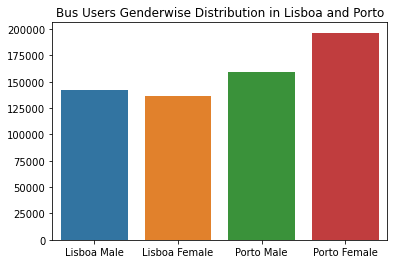

In [3]:
female_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_lisboa=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']
female_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Female')].sum()['Average_BusUsers_per_Day']
male_porto=userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['GenderDescription']=='Male')].sum()['Average_BusUsers_per_Day']

sns.barplot(x=['Lisboa Male','Lisboa Female','Porto Male','Porto Female'],y=[male_lisboa,female_lisboa,male_porto,female_porto]);
plt.title('Bus Users Genderwise Distribution in Lisboa and Porto');

We can see that there are more Male and Female Riders in Porto Region compared to Lisboa Region. So we can more focus on Lisboa to increase the bus rides keeping COVID guidelines intact. We can run more data driven campaigns.

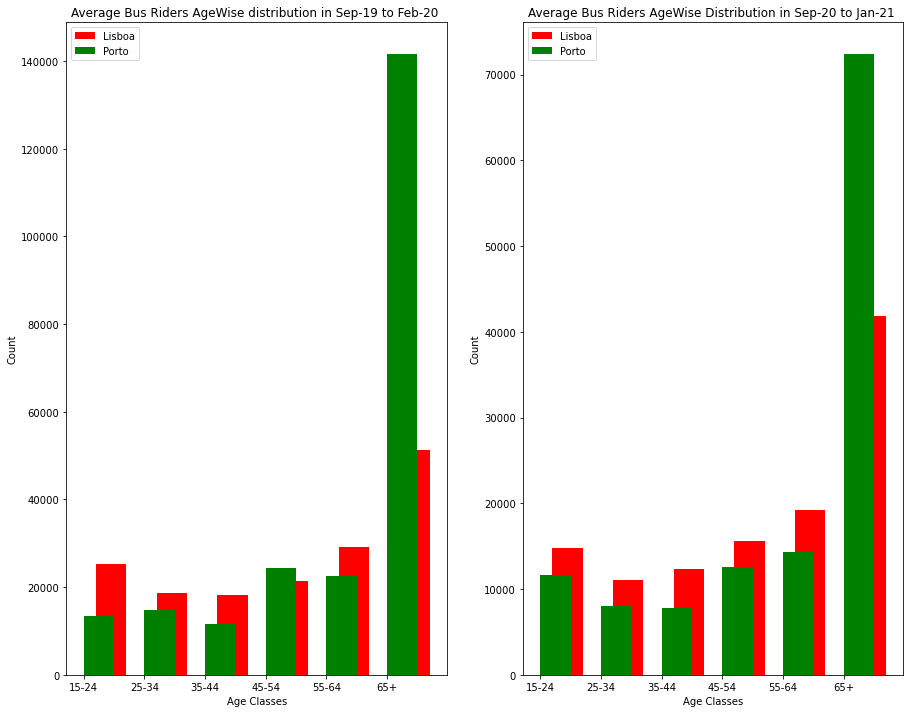

In [4]:
ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-19 to Feb-20') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

plt.figure(figsize=(15,12))
X = np.arange(len(ages_lisboa))
plt.subplot(1,2,1)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto'])
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages)
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise distribution in Sep-19 to Feb-20 ")
# Namimg the x and y axis
plt.xlabel('Age Classes')
plt.ylabel('Count')


ages=userpro.AgeClassDescription.unique()
ages_lisboa=[]
ages_porto =[]
for i in ages:
    ages_lisboa.append(userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])
    ages_porto.append(userpro[(userpro['Region_of_Origin']=='R2 - AM Porto') & (userpro['Period']=='Sep-20 to Jan-21') & (userpro['AgeClassDescription']==i)].sum()['Average_BusUsers_per_Day'])

X = np.arange(len(ages_lisboa))
plt.subplot(1,2,2)
plt.bar(X+0.7, ages_lisboa, color = 'r', width = 0.5);
plt.bar(X + 0.5, ages_porto, color = 'g', width = 0.5);
# Creating the legend of the bars in the plot
plt.legend(['Lisboa','Porto']);
# Overiding the x axis with the country names
plt.xticks([i + 0.25 for i in range(6)], ages);
# Giving the tilte for the plot
plt.title("Average Bus Riders AgeWise Distribution in Sep-20 to Jan-21 ");
# Namimg the x and y axis
plt.xlabel('Age Classes');
plt.ylabel('Count');

This graphs shows us the agewise riders distribution in  both Lisboa and Porto region for different peroid of time. The main takeway from this graph is that in both regions the Age Class of 65+ has observed the maximum number of riders. 
We suggest to run seperate buses for this age class, so that they can access bus easily in these unprecendent times and makes Portugal transportation Bus system more senior citizen friendly.

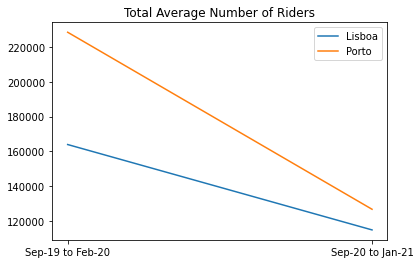

In [5]:
pr1_lisboa=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr2_lisboa=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R1 - AM Lisboa')].sum()['Average_BusUsers_per_Day']
pr1_porto=userpro[(userpro['Period']=='Sep-19 to Feb-20') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']
pr2_porto=userpro[(userpro['Period']=='Sep-20 to Jan-21') & (userpro['Region_of_Origin']=='R2 - AM Porto')].sum()['Average_BusUsers_per_Day']

sns.lineplot(y=[pr1_lisboa,pr2_lisboa],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
sns.lineplot(y=[pr1_porto,pr2_porto],x=['Sep-19 to Feb-20','Sep-20 to Jan-21']);
plt.title('Total Average Number of Riders');
plt.legend(['Lisboa',"Porto"]);

From above graph we can see that there has been a significant drop in the Avergae Rides.
This is mainly because of the COVID situation but still there are lot of hidden and uncaptured factors that are contributing to this drop.

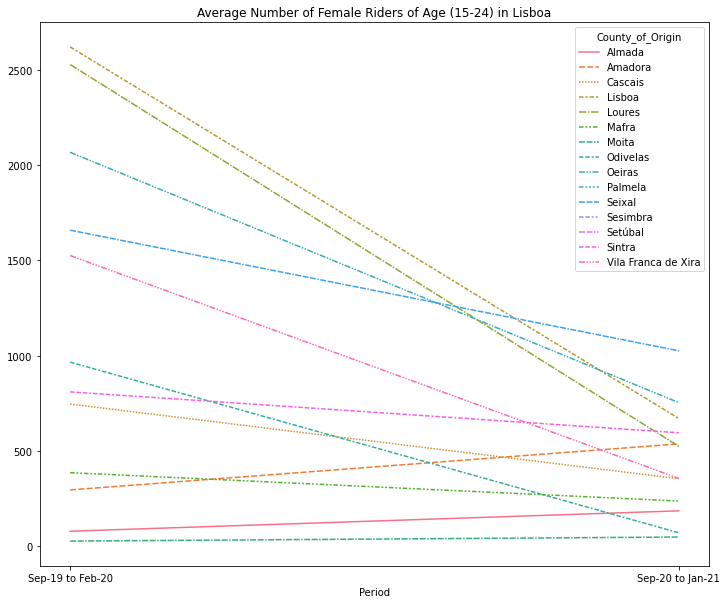

In [6]:
female_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Female')]
female_lisboa_15_temp=female_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=female_lisboa_15_temp);
plt.title('Average Number of Female Riders of Age (15-24) in Lisboa');

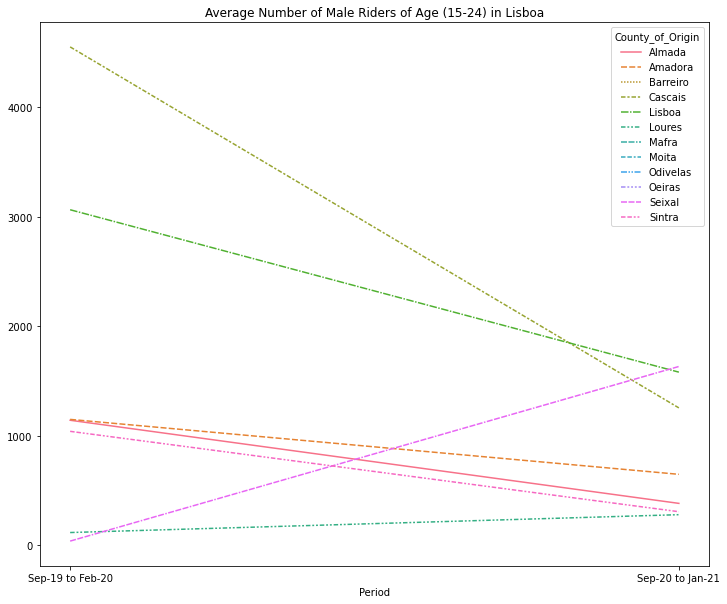

In [7]:
male_lisboa_15=userpro[(userpro['Region_of_Origin']=='R1 - AM Lisboa') & (userpro['AgeClassDescription']=='15-24')& (userpro['GenderDescription']=='Male')]
male_lisboa_15_temp=male_lisboa_15.pivot('Period','County_of_Origin','Average_BusUsers_per_Day')
plt.figure(figsize=(12,10));
sns.lineplot(data=male_lisboa_15_temp);
plt.title('Average Number of Male Riders of Age (15-24) in Lisboa');

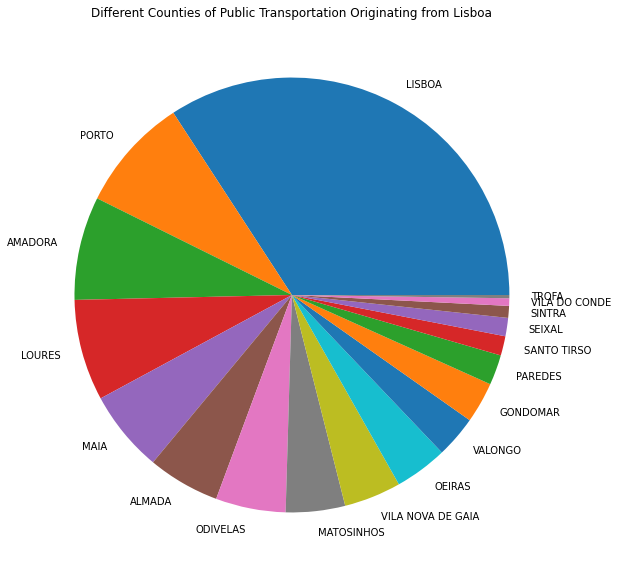

In [8]:
ttemp=od[(od['Region_of_Origin']=='R1 - AM Lisboa')]['County_of_Public_Transportation'].value_counts()

plt.figure(figsize=(12,10))
plt.pie(ttemp.values,labels=ttemp.index,);
plt.title('Different Counties of Public Transportation Originating from Lisboa');

Need some conculsion for last 3 graphs

## Data Engineering

In [9]:
#addding a new average temp field(average temp during that particular timep peroid)
temp=userpro[(userpro['Period']=='Sep-19 to Feb-20')]
temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})

temp1=userpro[(userpro['Period']=='Sep-20 to Jan-21')]
temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})

df=[temp,temp1]
new_userpro=pd.concat(df)

<ipython-input-9-cfddc4f0f276>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Average Temp']=temp['Region_of_Origin'].map({'R1 - AM Lisboa':17.0,'R2 - AM Porto':16.0})
<ipython-input-9-cfddc4f0f276>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Average Temp']=temp1['Region_of_Origin'].map({'R1 - AM Lisboa':15.2,'R2 - AM Porto':13.6})


In [10]:
#creating a column county_mean(mean encoding)
di=[]
for i in od.County_of_Origin.unique():
    di.append([len(od[(od['County_of_Origin']==i)])/99,i])
d = {}
for val in di:
    d[val[1]]=val[0]
od['New_county_mean']=od['County_of_Origin'].map(d)

In [11]:
#merging everything into the one dataset
merge=pd.merge(left=od,right=userpro.drop(['Region_of_Origin','District_of_Origin'],axis=1),on=['County_of_Origin'])
merge.to_csv('Final_Merge.csv',index=False)

In [12]:
merge.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,15-24,294.194206,17.0
1,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,25-34,1081.652817,17.0
2,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,35-44,235.836653,17.0
3,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,45-54,840.951323,17.0
4,R1 - AM Lisboa,Lisboa,Amadora,R1 - AM Lisboa,LISBOA,LISBOA,110608,0.307323,0.777778,Sep-19 to Feb-20,Female,55-64,1216.148092,17.0


## Feature Importance using Random Forest Regressor

In [13]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from sklearn import tree
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [14]:
df=pd.read_excel('Churn_UsersProfile.xlsx')
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817
2,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,35-44,235.836653
3,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,45-54,840.951323
4,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,55-64,1216.148092


In [15]:
#Convert the string values to numeric values using one hot encoding
data = ['District_of_Origin','County_of_Origin','Period','GenderDescription','AgeClassDescription']
for column in data:
    ord_enc = OrdinalEncoder()
    df[column] = ord_enc.fit_transform(df[[column]])

In [16]:
df.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day
0,R1 - AM Lisboa,1.0,2.0,0.0,0.0,0.0,294.194206
1,R1 - AM Lisboa,1.0,2.0,0.0,0.0,1.0,1081.652817
2,R1 - AM Lisboa,1.0,2.0,0.0,0.0,2.0,235.836653
3,R1 - AM Lisboa,1.0,2.0,0.0,0.0,3.0,840.951323
4,R1 - AM Lisboa,1.0,2.0,0.0,0.0,4.0,1216.148092


In [17]:
#creating a new dataset with limited features only
feature1 = df['District_of_Origin']
feature2 = df['Period']
feature3 = df['GenderDescription']
feature4 = df['AgeClassDescription']
feature5 = df['County_of_Origin']

In [18]:
features = [feature1,feature2,feature3,feature4,feature5]
X = pd.DataFrame(features).T
Y = df['Average_BusUsers_per_Day']
X.head()

,District_of_Origin,Period,GenderDescription,AgeClassDescription,County_of_Origin
0,1.0,0.0,0.0,0.0,2.0
1,1.0,0.0,0.0,1.0,2.0
2,1.0,0.0,0.0,2.0,2.0
3,1.0,0.0,0.0,3.0,2.0
4,1.0,0.0,0.0,4.0,2.0


In [19]:
X_train, X_test, y_train, y_te = train_test_split(X, Y, test_size = 0.8, random_state = 20)

rf = RandomForestRegressor(n_estimators = 50,
                           n_jobs = -1,
                           max_depth = 4,
                           random_state = 20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=50, n_jobs=-1, random_state=20)

<BarContainer object of 5 artists>

Text(0.5, 0, 'Random Forest Feature Importance')

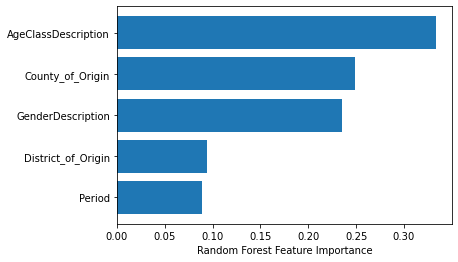

In [21]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Conculsion
- Using random forest feature importance is evaluated. 
- According to the model results, different features are used for prediction. The value for the feature importance is calculated with the Residual sum of square, The smaller this value is the higher the importance of the feature. 
- From the model and the graph ,it’s clear that Age description, county of origin and gender description are the features with higher importance. Thus these features can be used to predict the avg users travelling daily.

<h2>Visualising the tree</h2>

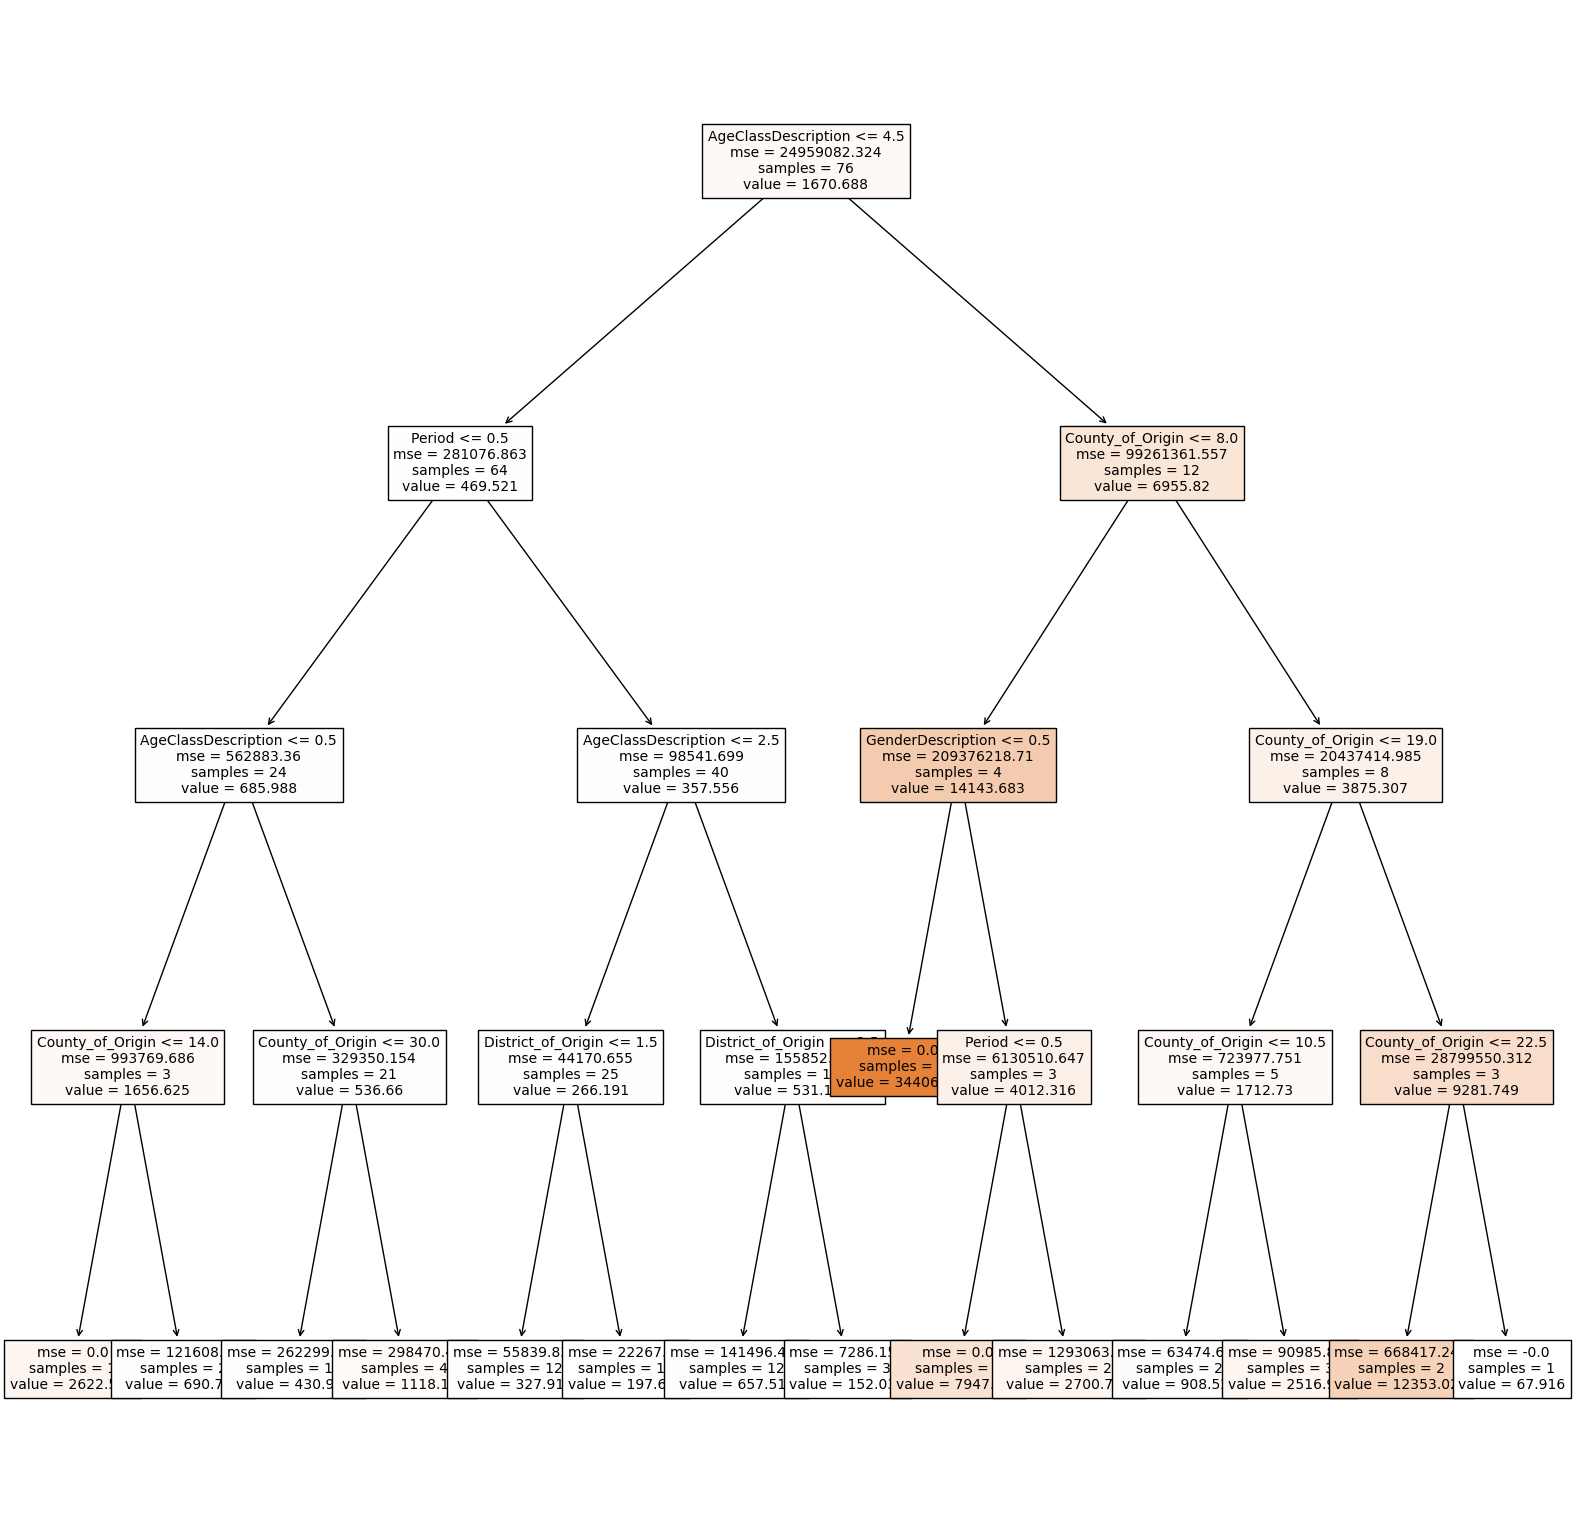

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=100)
tree.plot_tree(rf.estimators_[1],
               feature_names = X_train.columns.tolist(), 
               class_names=y_train.name,
               filled = True,fontsize=10);

fig.savefig('rf_individualtree.png');

In [23]:
data=pd.read_csv("Final_Merge.csv")

In [24]:
data=pd.get_dummies(data,columns = [column for column in data.columns[9:12]],prefix='dummy')
data.drop([column for column in data.columns if  "Origin" in column],axis=1,inplace=True)
data=pd.get_dummies(data,columns = [column for column in data.columns if "Region" in column],prefix = 'Region',drop_first=True)
data=pd.get_dummies(data,columns = [column for column in data.columns if "District" in column],prefix = 'District')
data=pd.get_dummies(data,columns = [column for column in data.columns if "County" in column],prefix = 'County')

In [25]:
data=data.rename(columns={column:column.replace(' ','_') for column in data})

In [26]:
data=data.rename(columns={"dummy_Sep-20_to_Jan-21":"sep_twenty_to_jan_twenty_one",
"dummy_Sep-19_to_Feb-20":"sep_nineteen_to_feb_twenty",                          
"Region_R2_-_AM_Porto":"Region_R2__AM_Porto",
"dummy_65+":"dummy_sixty_five_plus",
"dummy_15-24":"dummy_fifteen__thirty_four",
"dummy_25-34":"dummy_twenty_five__thirty_four",
"dummy_35-44":"dummy_thirty_five__forty_four",
"dummy_45-54":"dummy_forty_five__fifty_four",
"dummy_55-64":"dummy_fifty_five__sixty_four"})

In [27]:
X=data.drop(["Average_BusUsers_per_Day"],axis=1)
y=data["Average_BusUsers_per_Day"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [28]:
est = sm.OLS(y_train, X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Average_BusUsers_per_Day   R-squared:                       0.190
Model:                                  OLS   Adj. R-squared:                  0.190
Method:                       Least Squares   F-statistic:                     237.4
Date:                      Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                              00:15:37   Log-Likelihood:            -2.7239e+05
No. Observations:                     28294   AIC:                         5.448e+05
Df Residuals:                         28265   BIC:                         5.451e+05
Df Model:                                28                                         
Covariance Type:                  nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                        1.926e+04   7.45e+04      0.259      0.796   -1.27e+05    1.65e+05
Dicofre_ParishCode_of_Public_Transportation    -0.3117      1.539     -0.202      0.840      -3.329       2.705
Demand_weight                                -423.3158    541.713     -0.781      0.435   -1485.098     638.467
New_county_mean                              2890.7830    154.187     18.749      0.000    2588.569    3192.997
Average_Temp                                 -756.7451     34.348    -22.031      0.000    -824.069    -689.421
sep_nineteen_to_feb_twenty                   1.082e+04   3.73e+04      0.290      0.772   -6.22e+04    8.38e+04
sep_twenty_to_jan_twenty_one                 8446.5334   3.73e+04      0.227      0.821   -6.46e+04    8.15e+04
dummy_Female                                 9709.2825   3.73e+04      0.261      0.794   -6.33e+04    8.27e+04
dummy_Male                                   9552.8420   3.73e+04      0.256      0.798   -6.35e+04    8.26e+04
dummy_fifteen__thirty_four                   2471.1580   1.24e+04      0.199      0.842   -2.19e+04    2.68e+04
dummy_twenty_five__thirty_four               2225.8737   1.24e+04      0.179      0.858   -2.21e+04    2.66e+04
dummy_thirty_five__forty_four                2113.1095   1.24e+04      0.170      0.865   -2.22e+04    2.65e+04
dummy_forty_five__fifty_four                 2452.4815   1.24e+04      0.198      0.843   -2.19e+04    2.68e+04
dummy_fifty_five__sixty_four                 2744.1577   1.24e+04      0.221      0.825   -2.16e+04    2.71e+04
dummy_sixty_five_plus                        7255.3442   1.24e+04      0.584      0.559   -1.71e+04    3.16e+04
Region_R2__AM_Porto                          4901.7145   1.93e+04      0.254      0.800   -3.29e+04    4.27e+04
District_LISBOA                              3470.3284   8219.946      0.422      0.673   -1.26e+04    1.96e+04
District_PORTO                               4901.7145   1.93e+04      0.254      0.800   -3.29e+04    4.27e+04
District_SETÚBAL                             1.089e+04    4.7e+04      0.232      0.817   -8.12e+04    1.03e+05
County_ALMADA                                5344.2826    2.3e+04      0.233      0.816   -3.97e+04    5.03e+04
County_AMADORA                                687.8108   2003.617      0.343      0.731   -3239.375    4614.997
County_GONDOMAR                               102.3470    710.794      0.144      0.886   -1290.844    1495.538
County_LISBOA                                 451.8160    660.205      0.684      0.494    -842.217    1745.849
County_LOURES                                 481.7808    792.797      0.608      0.543   -1072.139    20

In [ ]:
# zeeshan please provide some info related to OLS summary

In [29]:
train_data=pd.concat([X_train,y_train],axis=1)
train_data.head()

,const,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Average_Temp,sep_nineteen_to_feb_twenty,sep_twenty_to_jan_twenty_one,dummy_Female,dummy_Male,dummy_fifteen__thirty_four,...,County_PAREDES,County_PORTO,County_SANTO_TIRSO,County_SEIXAL,County_SINTRA,County_TROFA,County_VALONGO,County_VILA_DO_CONDE,County_VILA_NOVA_DE_GAIA,Average_BusUsers_per_Day
8564,1.0,131203,0.000021,0.757576,17.0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1217.088440
5433,1.0,110707,0.000001,1.000000,17.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2919.594549
27944,1.0,131726,0.000065,0.888889,16.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,343.643229
35549,1.0,130814,0.011427,0.575758,13.6,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,104.828180
33800,1.0,111012,0.000286,0.959596,16.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1425.301241


## Using a forward selection approach to reduce multi-collinearity and optimize on R-squared

In [30]:
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [31]:
new_model=forward_selected(train_data,"Average_BusUsers_per_Day")
new_model.summary()

KeyboardInterrupt: 

<h4>Interpretation of OLS estimator and a potential plan of action</h4>



*  The baseline daily average passengers per day is 6839

* The presence of a dummy variable indicating if a passengers age is 55-64 leads to to an increase in the daily average bus users by approx while the presence of  above 65 years variable  leads to an approx. 4795 increase, which can be inferred as the need to target a bus transport checkpoints populated with people aged 55-65+

* The increase in county_mean by one unit causes the average daily bus users to rise by 2899 

* The presence of the female variable leads to an increase in avg daily bus users by 157(campaigns to attract women passengers can lead from coloring the buses with colors loved by female passengers,ad-campaigns on the buses targeted exclusively towards female-only products etc.)




In [ ]:
img = plt.imread("Counties_to_be_targeted.PNG") 
plt.imshow('',img) 

In [ ]:
img = plt.imread("New_county_mean.PNG") 
plt.imshow('',img) 

In [ ]:
#Avergae Bus user prediction
y_pred=new_model.predict(X_test)
r2_score(y_test,y_pred)

## Ensemble Modelling

In [32]:
#copying the merge dataset to train 
train=merge.copy()

In [33]:
labs=['Region_of_Origin', 'District_of_Origin', 'County_of_Origin',
       'Region_of_Public_Transportation', 'District_of_Public_Transportation',
       'County_of_Public_Transportation',
       'Period', 'GenderDescription', 'AgeClassDescription','Dicofre_ParishCode_of_Public_Transportation']

#coverting all the columns categorical datat to ordinal encoding
for i in labs:
    ord_enc = OrdinalEncoder()
    train[i] = ord_enc.fit_transform(train[[i]])

In [34]:
train.head()

,Region_of_Origin,District_of_Origin,County_of_Origin,Region_of_Public_Transportation,District_of_Public_Transportation,County_of_Public_Transportation,Dicofre_ParishCode_of_Public_Transportation,Demand_weight,New_county_mean,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,Average Temp
0,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,0.0,294.194206,17.0
1,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,1.0,1081.652817,17.0
2,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,2.0,235.836653,17.0
3,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,3.0,840.951323,17.0
4,0.0,1.0,2.0,0.0,0.0,3.0,3.0,0.307323,0.777778,0.0,0.0,4.0,1216.148092,17.0


In [35]:
X=train.drop('Average_BusUsers_per_Day',axis=1)
y=train['Average_BusUsers_per_Day']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.50, random_state=354)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=34)

Creating 3 dataset-  Training (50%), Validation(25%), testing (25%).
First 2 models will be trained on Training set and tested on Validation Set.
Final Model will be trained on predictions we get on validation set and tested on prediction on testing set.

In [36]:
# it helps us to check the correlation between of differnt variables wioth Average Bus Users.
X.corrwith(y).sort_values()

Period                                        -0.095254
County_of_Origin                              -0.072147
GenderDescription                             -0.015933
Demand_weight                                 -0.012056
District_of_Origin                             0.014348
Average Temp                                   0.019094
District_of_Public_Transportation              0.028892
County_of_Public_Transportation                0.029355
Dicofre_ParishCode_of_Public_Transportation    0.030977
Region_of_Public_Transportation                0.038908
Region_of_Origin                               0.130687
New_county_mean                                0.168141
AgeClassDescription                            0.246075
dtype: float64

### Random Forest Regressor Model

In [37]:
#Random forest Model
rfr =RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr=rfr.predict(X_valid)
print(mean_absolute_error(y_valid,pred_rfr))

RandomForestRegressor()

8.807106912944642


### Decision Tree Regressor Model

In [38]:
#Decision tree regressor model
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_valid)
print(mean_absolute_error(y_valid,pred_dt))

DecisionTreeRegressor()

3.3741416725388307


In [39]:
#creating a validation prediction dataset with all the predictions containing the ground truth as well (validation set)
valid_pred=pd.DataFrame(data=y_valid)
valid_pred['pred_rfr']=pred_rfr
valid_pred['pred_dt']=pred_dt
valid_pred.head()

,Average_BusUsers_per_Day,pred_rfr,pred_dt
5849,783.473925,783.473925,783.473925
26779,5.514983,5.514983,5.514983
33863,891.159557,891.159557,891.159557
9061,5441.109494,5441.109494,5441.109494
36666,27.625672,27.625672,27.625672


In [40]:
#creating a testing predciton dataset with all the predictions containing the ground truth as well(testing set)
test_pred=pd.DataFrame(data=y_test)
test_pred['pred_rfr']=rfr.predict(X_test)
test_pred['pred_dt']=dt.predict(X_test)
test_pred.head()

,Average_BusUsers_per_Day,pred_rfr,pred_dt
13647,822.201267,822.201267,822.201267
30622,458.625209,457.185410,458.625209
18071,180.985328,180.985328,180.985328
12581,6687.302831,6687.302831,6687.302831
8680,23.104181,23.104181,23.104181


In [41]:
#final Decison Tree regressor Model
final_dt=DecisionTreeRegressor()
X_valid_t=valid_pred.drop('Average_BusUsers_per_Day',axis=1)
y_valid_t=valid_pred['Average_BusUsers_per_Day']
final_dt.fit(X_valid_t,y_valid_t)
final_pred=final_dt.predict(test_pred.drop('Average_BusUsers_per_Day',axis=1))
mean_absolute_error(y_test,final_pred)

DecisionTreeRegressor()

0.28099191628762554

In [42]:
r2_score(y_test,final_pred)

0.999997626881063

Our Ensemble model consists of 2 level: 
- 1st Level- Decision Tree and Random forest
- 2nd Level - Decision Tree.

At the end, we are acheiving the R2 score of 0.9999 on the testing set which shows that are model is doing good on Unseen datset as well.

<h4> Our Ensemble can be used as the black box to predict the Average Number of Bus users based on the different factors</h4>
Using this, we can strategically deploy the buses on the particular route in an optimised way which will result in the less Air pollution and More user and environment friendly transportation in the Portugal.

## Conclusions

### Scalability and Impact

Scalability:
The models can be scaled upto an aggregation of counties across Portugal 




Limitations:
The models inherently make underlying assumptions about the nature and distribution of certain input variables which might not conform perfectly in some cases where many assumptions are violated



Social Impact of the solution:
The estimators can help improve mobility and pain-points for an age demographic from 55-65+ aka the middle age and the senior citizen population while also helping the female population get easier access to public transport



# Future Work

If we had access to the data mentioned below, we would have been able to solve this challenge even better.

1.Date Period : In our opinion, if the date period was given for each month,a time series analysis model could be used to forecast the number of passengers for a particular region.

2.Ticket Data for the particular region: Each ticket price a person pays is according to the number of stops they will be on the bus. By looking at the stops in the ticket we can deduct whether if a person would get off a bus early and can deduct if the bus can accomodate more passengers.

3.Air pollution: The openweather API only provides air pollution data from Novemeber 11 2020, if we had the data for the period given in the dataset we could use air pollution data to prove the models scalability.